<a href="https://colab.research.google.com/github/nourel25/Potato-Disease/blob/main/Potato_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [61]:
from google.colab import files

uploaded = files.upload()

Saving Potato.zip to Potato (2).zip


In [62]:
import zipfile

with zipfile.ZipFile('Potato.zip', 'r') as zip_ref:
  zip_ref.extractall('potatos')

In [63]:
DATA_DIR = 'potatos/Potato'

In [64]:
healthy = os.path.join(DATA_DIR, 'Potato___healthy')
early_blight = os.path.join(DATA_DIR, 'Potato___Early_blight')
late_blight = os.path.join(DATA_DIR, 'Potato___Late_blight')

In [65]:
print(f"There are {len(os.listdir(healthy))} images of healthy.")
print(f"There are {len(os.listdir(early_blight))} images of early_blight.")
print(f"There are {len(os.listdir(late_blight))} images of late_blight.")

There are 152 images of healthy.
There are 1000 images of early_blight.
There are 1000 images of late_blight.


In [165]:
train, val = tf.keras.utils.image_dataset_from_directory(
    directory=DATA_DIR,
    image_size=(256, 256),
    batch_size=32,
    label_mode='int',
    validation_split=0.15,
    subset='both',
    seed=42
)

Found 2152 files belonging to 3 classes.
Using 1830 files for training.
Using 322 files for validation.


In [166]:
for images, labels in train.take(1):
    print(f'Shape of batch of images: {images.shape}')
    print(f'Shape of batch of labels: {labels.shape}')

Shape of batch of images: (32, 256, 256, 3)
Shape of batch of labels: (32,)


In [68]:
class_names = train.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

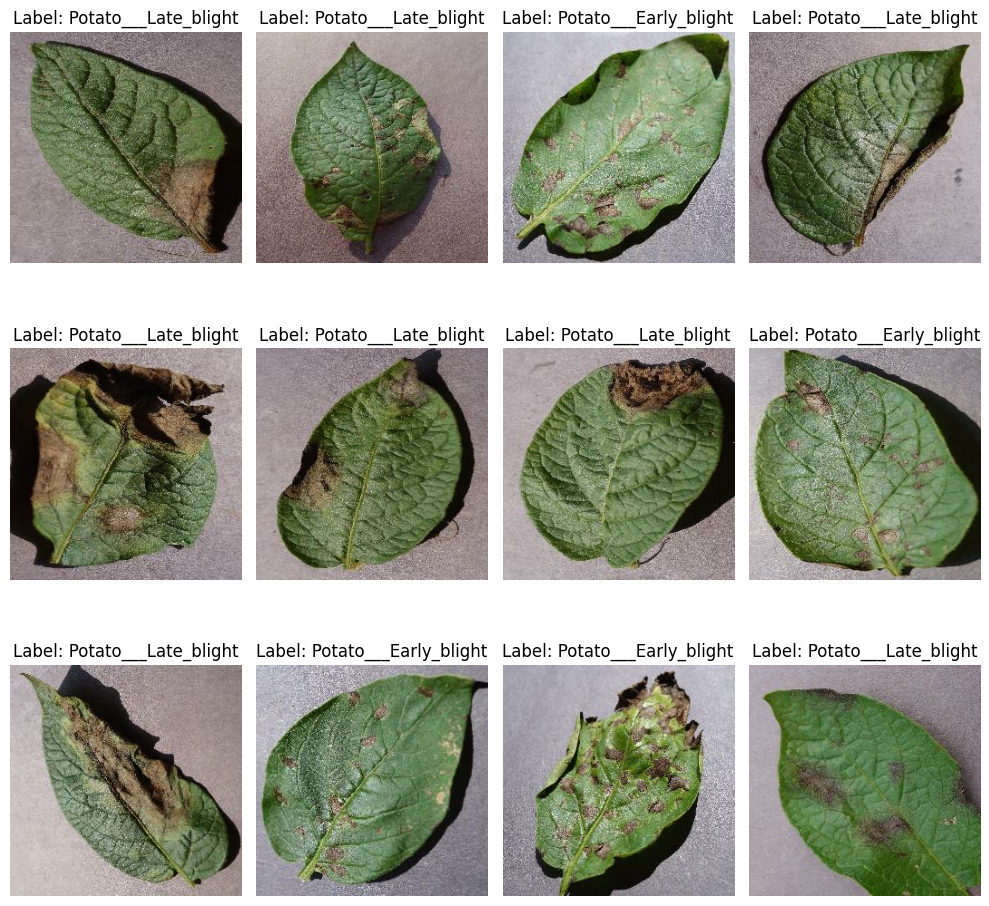

In [69]:
fig, ax = plt.subplots(3, 4, figsize=(10,10))
axes = ax.flatten()

for images, labels in train.take(1):
    for i in range(12):
        axes[i].imshow(images[i].numpy().astype('uint8'))
        axes[i].set_title(f'Label: {class_names[labels[i]]}')
        axes[i].axis('off')

plt.tight_layout()
plt.show()

In [141]:
augmentation_layers = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.3, fill_mode='nearest')
])

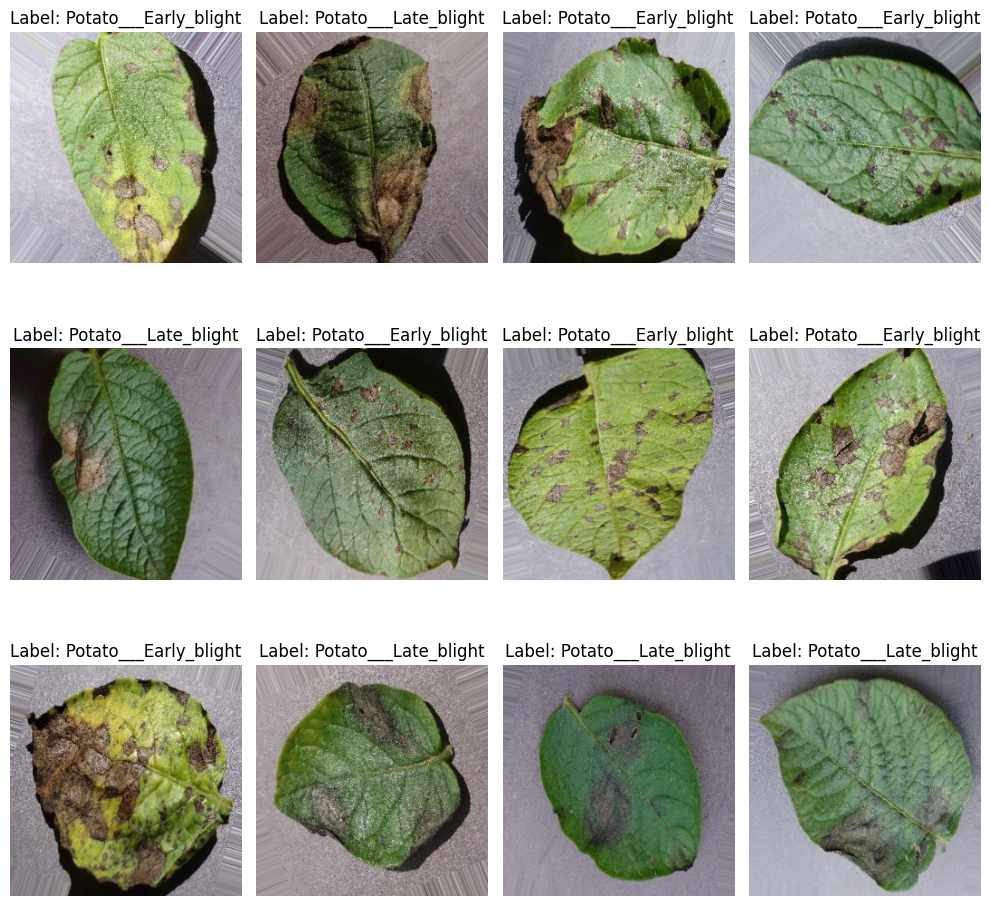

In [142]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 4, figsize=(10, 10))
axes = ax.flatten()

for images, labels in train.take(1):
    for i in range(12):
        img = images[i].numpy().astype('uint8')
        aug_img = augmentation_layers(tf.expand_dims(img, axis=0))
        axes[i].imshow(aug_img[0].numpy().astype('uint8'))
        axes[i].set_title(f'Label: {class_names[labels[i]]}')
        axes[i].axis('off')

plt.tight_layout()
plt.show()


In [181]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),
    augmentation_layers,
    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

In [182]:
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_18 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_19 (Rescaling)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_93 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_93 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_94 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_94 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_95 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_95 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_96 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_96 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_97 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_97 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_98 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_98 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [183]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [184]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= 0.98 and logs['val_accuracy'] >= 0.95:
            self.model.stop_training = True

In [185]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_final = train.cache().shuffle(SHUFFLE_BUFFER_SIZE).prefetch(PREFETCH_BUFFER_SIZE)
val_final = val.cache().prefetch(PREFETCH_BUFFER_SIZE)

In [186]:
history = model.fit(
	train_final,
	epochs=50,
	validation_data=val_final,
	callbacks = [EarlyStoppingCallback()]
)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.4189 - loss: 0.9477 - val_accuracy: 0.3944 - val_loss: 0.8974
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.5829 - loss: 0.7697 - val_accuracy: 0.7609 - val_loss: 0.5521
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.7451 - loss: 0.5496 - val_accuracy: 0.8168 - val_loss: 0.4680
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.8044 - loss: 0.4598 - val_accuracy: 0.9255 - val_loss: 0.2687
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.8592 - loss: 0.3340 - val_accuracy: 0.8354 - val_loss: 0.3807
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.8915 - loss: 0.2738 - val_accuracy: 0.9348 - val_loss: 0.2043
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9062 - loss: 0.2338 - val_accuracy: 0.9068 - val_loss: 0.3630
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9211 - loss: 0.1971 - val_accuracy: 0.9193 - v

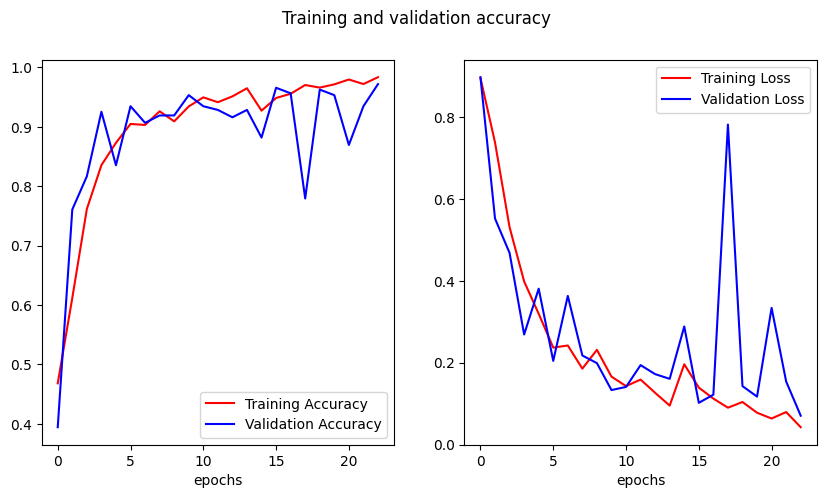

In [187]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()